# Housing Prices Analysis Project

## Overview
This project aims to analyze housing price data to identify key factors affecting house prices and to develop a predictive model to estimate property prices based on various attributes. The dataset is sourced from the Kaggle Housing Prices Competition.

## Table of Contents
1. [Data Acquisition](#1-data-acquisition)
2. [Data Exploration](#2-data-exploration)
3. [Data Cleaning](#3-data-cleaning)
4. [Exploratory Data Analysis (EDA)](#4-exploratory-data-analysis-eda)
5. [Reporting Findings](#5-reporting-findings)
6. [Conclusion and Future Work](#6-conclusion-and-future-work)


## 1. Data Acquisition

- **Source**: The dataset was sourced from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [44]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# loading the dataset
df = pd.read_csv('Data/Housing Prices Dataset.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## 2. Data Exploration

In [46]:
# the shape of the DataFrame
print(f'The Housing Prices Dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The Housing Prices Dataset has 1459 rows and 80 columns


In [47]:
# all the columns in the DataFrame
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [48]:
# descriptive statistics for all columns
df.describe().round(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.00,1459.00,1232.00,1459.00,1459.00,1459.00,1459.00,1459.00,1444.00,1458.00,...,1458.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00
mean,2190.00,57.38,68.58,9819.16,6.08,5.55,1971.36,1983.66,100.71,439.20,...,472.77,93.17,48.31,24.24,1.79,17.06,1.74,58.17,6.10,2007.77
std,421.32,42.75,22.38,4955.52,1.44,1.11,30.39,21.13,177.63,455.27,...,217.05,127.74,68.88,67.23,20.21,56.61,30.49,630.81,2.72,1.30
min,1461.00,20.00,21.00,1470.00,1.00,1.00,1879.00,1950.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00
25%,1825.50,20.00,58.00,7391.00,5.00,5.00,1953.00,1963.00,0.00,0.00,...,318.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,2007.00
50%,2190.00,50.00,67.00,9399.00,6.00,5.00,1973.00,1992.00,0.00,350.50,...,480.00,0.00,28.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00
75%,2554.50,70.00,80.00,11517.50,7.00,6.00,2001.00,2004.00,164.00,753.50,...,576.00,168.00,72.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00
max,2919.00,190.00,200.00,56600.00,10.00,9.00,2010.00,2010.00,1290.00,4010.00,...,1488.00,1424.00,742.00,1012.00,360.00,576.00,800.00,17000.00,12.00,2010.00


## 3. Data Cleaning

### 3.1 Identifying the Missing Data

In [49]:
# cheking to see if there are any missing values
print(df.isnull().sum())



Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


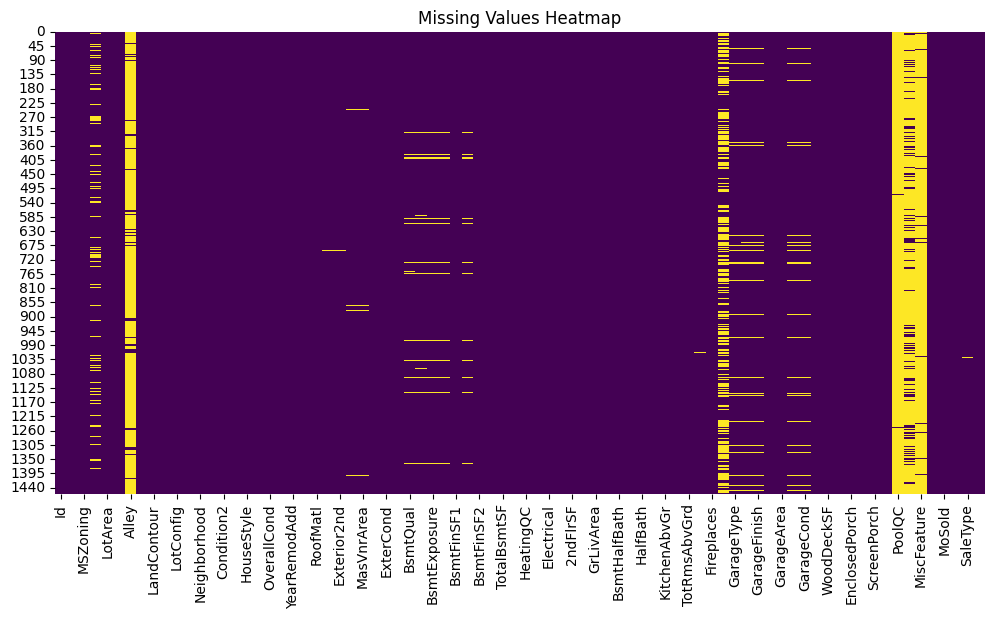

In [50]:
# visualizing the missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### 3.2. Handling Missing Values

In [51]:
# removing columns with more than 30% missing values
threshold = len(df) * 0.3
df.dropna(thresh=threshold, axis=1, inplace=True)


In [52]:
# filling the missing values
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True) 
df['GarageType'].fillna('None', inplace=True)  

### 3.3 Handling Duplicates

In [53]:
# looking for duplicated rows
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f'Duplicate Rows: {duplicates}')
else:
    print('No Duplicate Rows Found')

No Duplicate Rows Found


### 3.4 Data Type Conversion

In [54]:
# checking the data types
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 76, dtype: object


In [55]:
# converting categorical features to category types
categorical_cols = ['Neighborhood', 'LandContour', 'Utilities', 'MSZoning', 'SaleType']
for col in categorical_cols:
    df[col] = df[col].astype('category')


### 3.5 Final Review of the Cleaned Data

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1459 non-null   int64   
 1   MSSubClass     1459 non-null   int64   
 2   MSZoning       1455 non-null   category
 3   LotFrontage    1459 non-null   float64 
 4   LotArea        1459 non-null   int64   
 5   Street         1459 non-null   object  
 6   LotShape       1459 non-null   object  
 7   LandContour    1459 non-null   category
 8   Utilities      1457 non-null   category
 9   LotConfig      1459 non-null   object  
 10  LandSlope      1459 non-null   object  
 11  Neighborhood   1459 non-null   category
 12  Condition1     1459 non-null   object  
 13  Condition2     1459 non-null   object  
 14  BldgType       1459 non-null   object  
 15  HouseStyle     1459 non-null   object  
 16  OverallQual    1459 non-null   int64   
 17  OverallCond    1459 non-null   in

In [57]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.334476,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,20.569211,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,60.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,78.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## 4. Exploratory Data Analysis (EDA)

### 4.1. Objective of EDA
The goal of this Exploratory Data Analysis (EDA) is to visually and statistically analyze the dataset to summarize its main characteristics. We will focus on identifying relationships between features, distributions of key variables, and potential outliers.

### 4.2. Visualizations and Summary Statistics

#### 1. Distribution of Lot Area

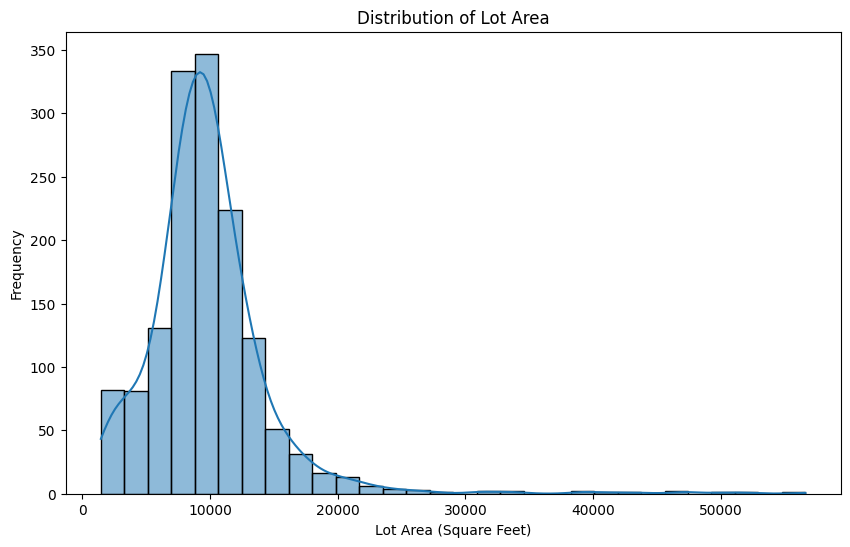

In [58]:
plt.figure(figsize=(10, 6))

sns.histplot(df['LotArea'], bins=30, kde=True)
plt.title('Distribution of Lot Area')
plt.xlabel('Lot Area (Square Feet)')
plt.ylabel('Frequency')

plt.show()


#### 2. Correlation between Features

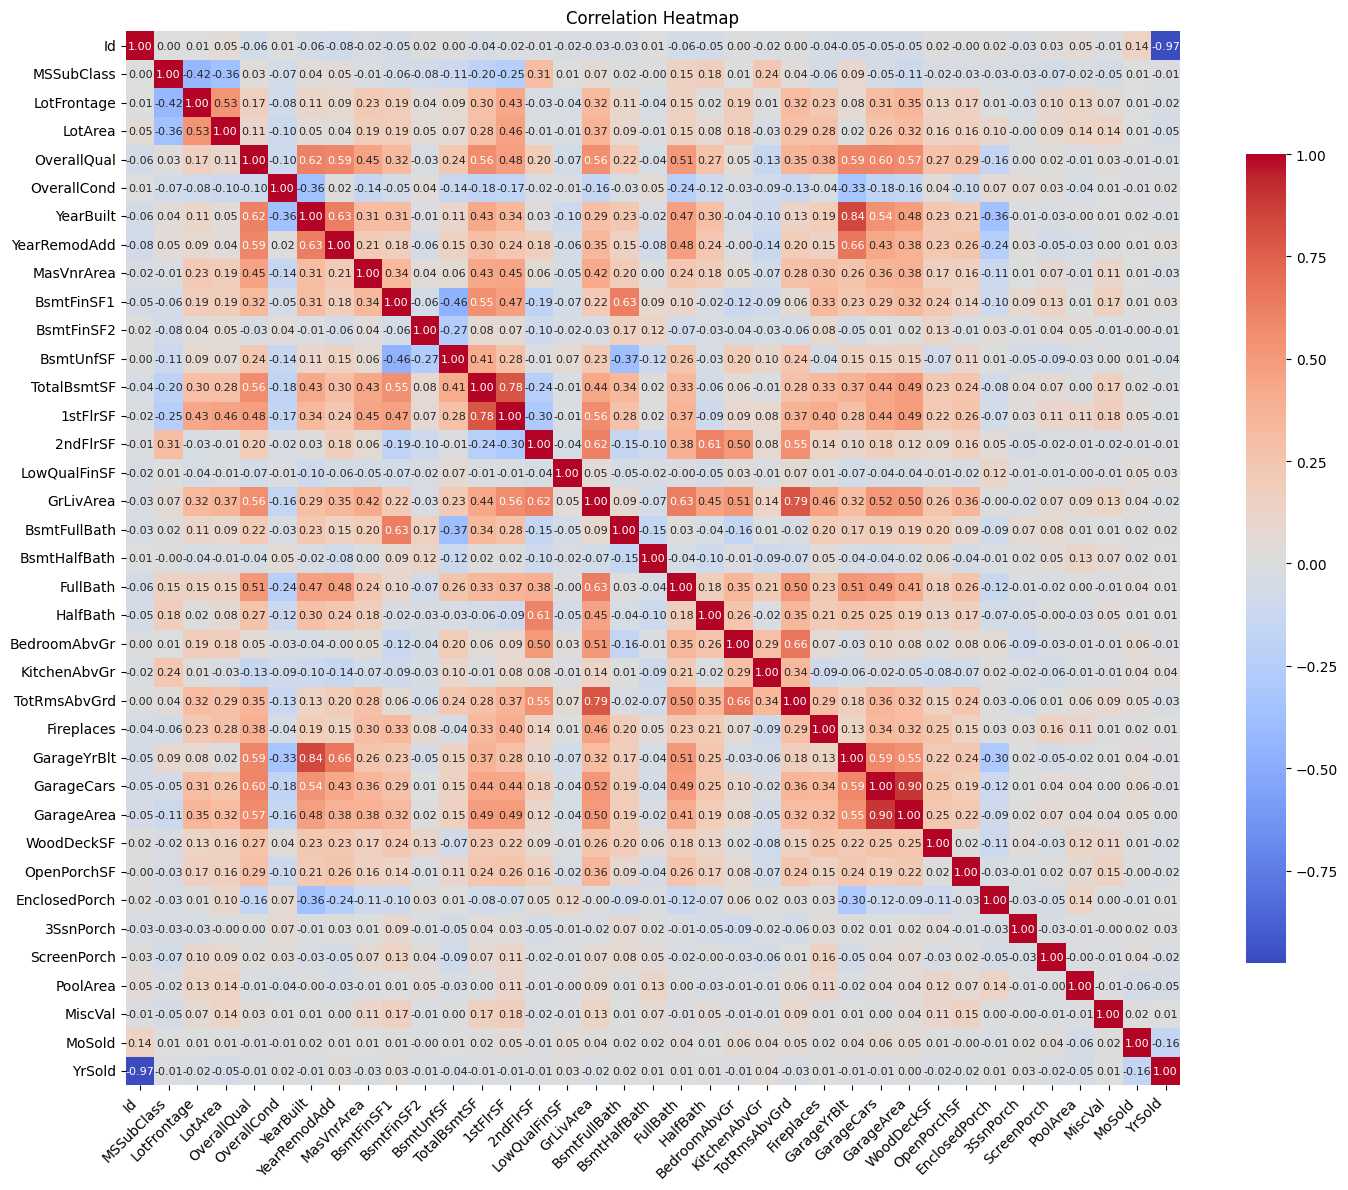

In [59]:
# calculating correlations
correlation_matrix = df.corr(numeric_only=True)  # include only numeric columns

plt.figure(figsize = (17, 15))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, annot_kws={'size': 8}, cbar_kws={"shrink": .7})

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.title('Correlation Heatmap')
plt.show()


#### 3. Relationship Between Features
Overall Quality vs Living Area

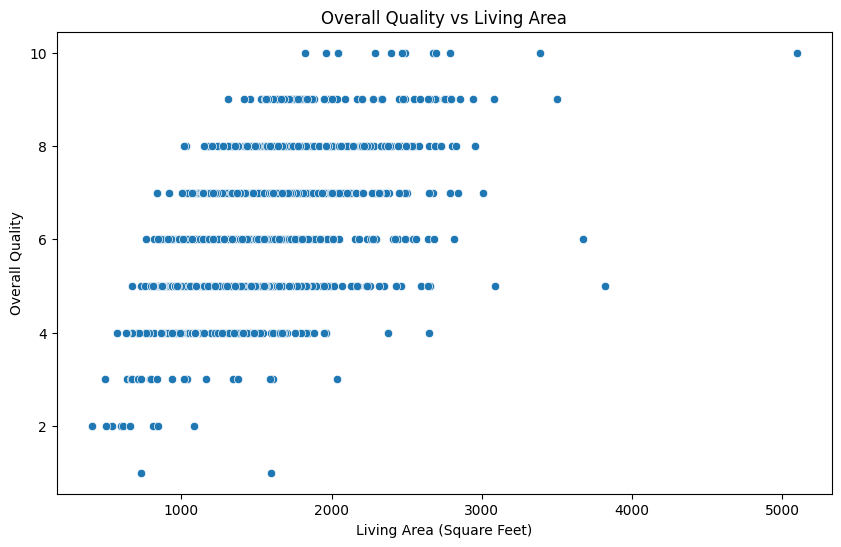

In [60]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='GrLivArea', y='OverallQual', data=df)
plt.title('Overall Quality vs Living Area')
plt.xlabel('Living Area (Square Feet)')
plt.ylabel('Overall Quality')

plt.show()

#### 4. Categorical Features Analysis
Count of Houses by Neighborhood

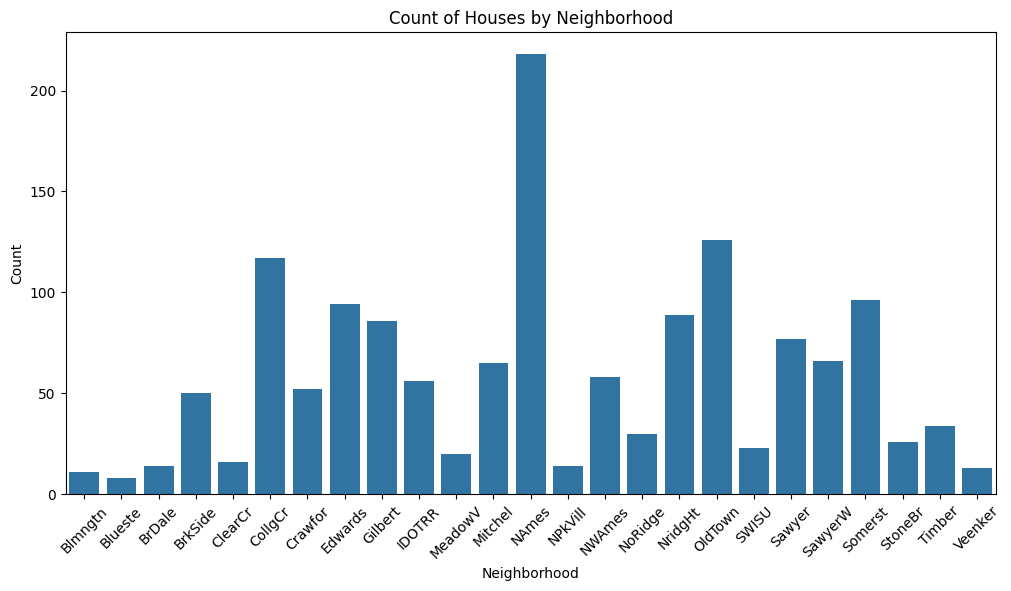

In [61]:
plt.figure(figsize=(12, 6))

sns.countplot(x='Neighborhood', data=df)
plt.xticks(rotation=45)
plt.title('Count of Houses by Neighborhood')
plt.ylabel('Count')
plt.xlabel('Neighborhood')

plt.show()


Overall Quality by Neighborhood

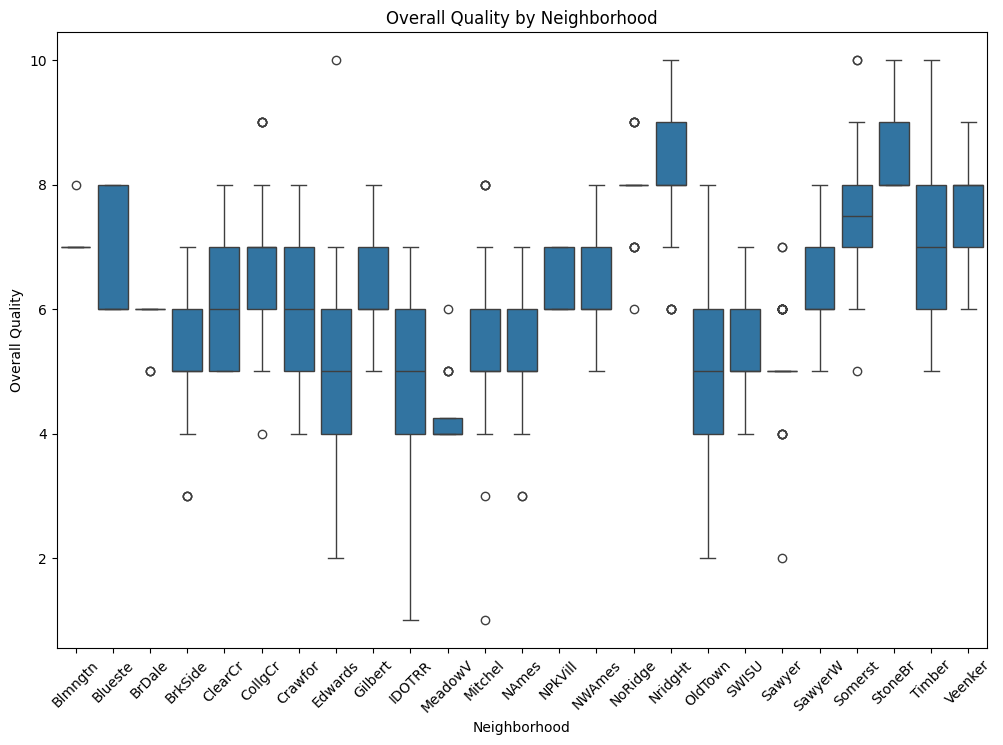

In [62]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='Neighborhood', y='OverallQual', data=df)
plt.xticks(rotation=45)
plt.title('Overall Quality by Neighborhood')
plt.ylabel('Overall Quality')
plt.xlabel('Neighborhood')

plt.show()


## 5. Reporting Findings
### 5.1. Summary of Key Findings
In this section, we summarize the key insights derived from the EDA and feature engineering steps of our housing prices analysis:

#### a. Distribution of Lot Area
- The distribution of lot area is right-skewed, indicating that there are houses with a very large lot area, but most homes tend to have smaller lot sizes.
- The histogram showed that most properties are clustered around the smaller lot size ranges.

#### b. Correlation Insights
The correlation heatmap revealed that 'OverallQual' and 'GrLivArea' are strongly correlated with each other and with lot value. This suggests that higher quality and larger living area correspond to higher home values, which is consistent with typical real estate market behavior.

#### c. Insights from Feature Relationships
The scatter plot of GrLivArea vs. OverallQual indicated a positive relationship; higher quality homes tend to have larger living areas.
Analyzing the Neighborhood data showed significant differences in average home quality, with certain neighborhoods consistently rated higher, suggesting location is a vital factor for home prices.

## 6. Conclusion and Future Work
Based on the analysis conducted, we established that certain features, particularly 'OverallQual', 'GrLivArea', and location (i.e., 'Neighborhood'), play significant roles in determining home values. Future analysis may focus on building predictive models using these insights to forecast property values more accurately.